In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [3]:
df=pd.read_csv("Instagram_data.csv", encoding='latin1')
df.head()

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learning model an...   
3  Heres how you can write a Python program to d...   
4  Plotting annotations while visualizing your da...   

                                            Hashtags  
0  #finance #money #business #investing #investme...  
1  #healthcare #health #covid #data #datascience ...  
2  #data #datascience #dataanalysis #dataanalytic...  
3  #python #pythonprogramming #pythonprojects #py...  
4  #datavisualization #datascience #data #dataana...

In [4]:
df.Caption.unique()

array(['Here are some of the most important data visualizations that every Financial Data Analyst/Scientist should know.',
       'Here are some of the best data science project ideas on healthcare. If you want to become a data science professional in the healthcare domain then you must try to work on these projects.',
       'Learn how to train a machine learning model and giving inputs to your trained model to make predictions using Python.',
       'Here\x92s how you can write a Python program to detect whether a sentence is a question or not. The idea here is to find the words that we see in the beginning of a question in the beginning of a sentence.',
       'Plotting annotations while visualizing your data is considered good practice to make the graphs self-explanatory. Here is an example of how you can annotate a graph using Python.',
       'Here are some of the most important soft skills that every data scientist should have.',
       'Learn how to analyze a candlestick chart 

In [5]:
# let’s have a look at whether this dataset contains any null values or no
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


# Analyzing Instagram Reach

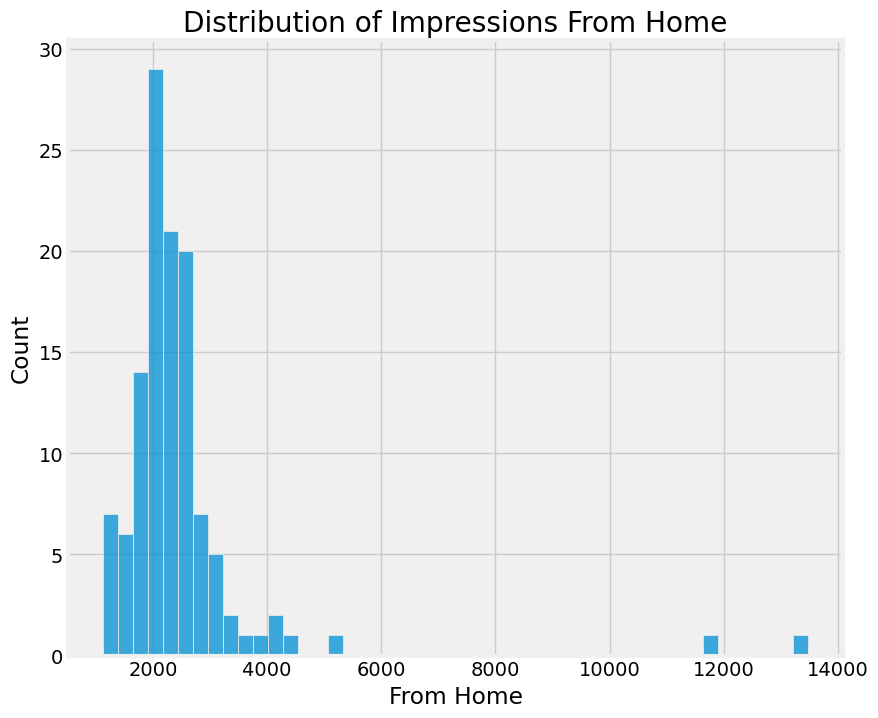

In [7]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.histplot(df['From Home'])
plt.show()

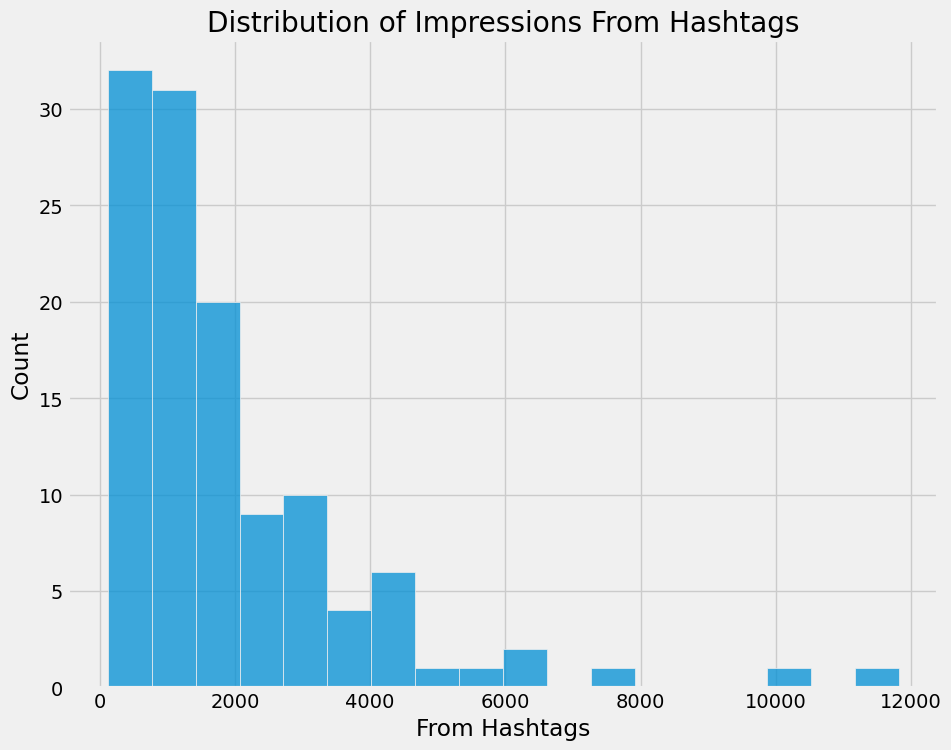

In [8]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.histplot(df['From Hashtags'])
plt.show()

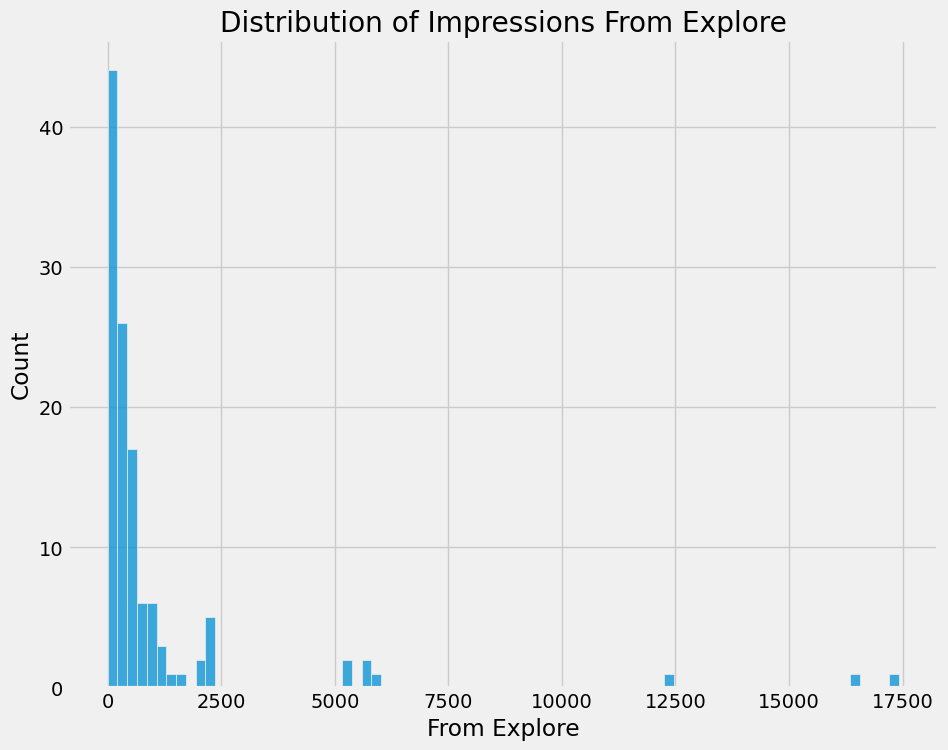

In [9]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.histplot(df['From Explore'])
plt.show()

In [10]:
#let’s have a look at the percentage of impressions I get from various sources on Instagram:
home= df['From Home'].sum()
hashtags= df['From Hashtags'].sum()
explore= df['From Explore'].sum()
other= df['From Other'].sum()
labels= ['From Home', 'From Hashtags', 'From Explore', 'Other' ]
values= [home, hashtags, explore, other]
fig= px.pie(df, values=values, names=labels, title='Impressions on Instagram Posts from various Sources')
fig.show()

# Analyzing Content of Instagram Posts

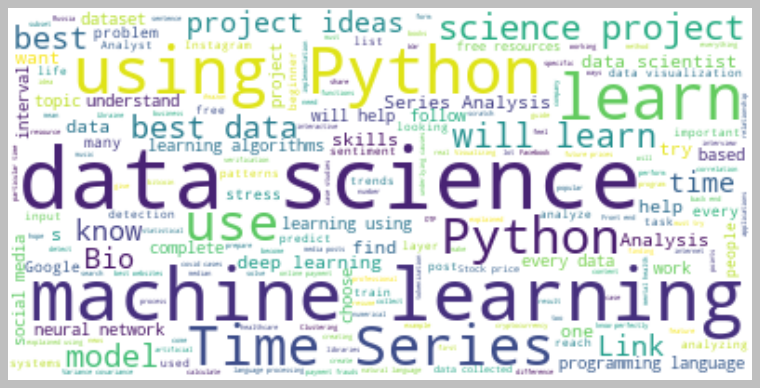

In [15]:
text= " ".join( i for i in df.Caption)
stopwords= set(STOPWORDS)
wordcloud= WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(wordcloud,interpolation='bilinear')


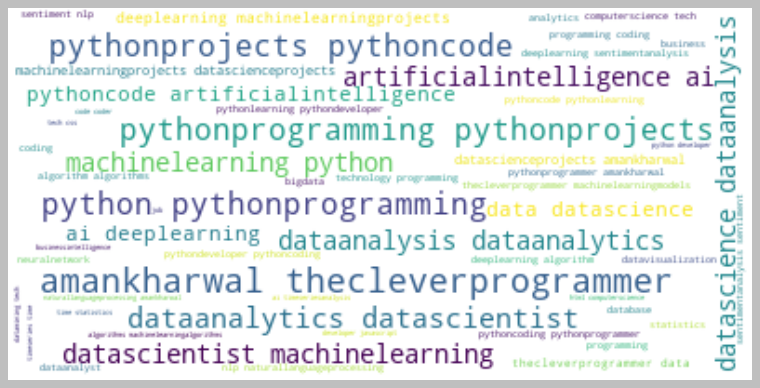

In [20]:
# let’s create a wordcloud of the hashtags column to look at the most used hashtags in my Instagram post
text= " ".join(i for i in df.Hashtags)
stopwords= set(STOPWORDS)
wordcloud= WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Analyzing Relationships to find the most important factors of our Instagram reach: relationship between the number of likes, number of impressions, comments  

In [26]:
figure= px.scatter(data_frame=df, x="Impressions", y="Likes", size="Likes", title="Relationship between Likes and Impressions")
figure.show()

In [29]:
figure= px.scatter(data_frame= df, x="Impressions", y="Likes", size="Likes", title="Relationship between impression and comments")
figure.show()

In [32]:
figure= px.scatter(data_frame= df, x="Impressions", y="Shares", size="Shares", title="Relationship Between Shares and TotAL iMPRESSIONS")
figure.show()

In [33]:
figure= px.scatter(data_frame= df, x="Impressions", y="Saves", size="Saves", title="Relationship Between Post Saves and Total Impressions")
figure.show()

#### let’s have a look at the correlation of all the columns with the Impressions column

In [35]:
correlation= df.corr(numeric_only = True)
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


##### Regarding to correlation of columns, We can say that more likes and saves will help you get more reach on Instagram. The higher number of shares will also help you get more reach, but a low number of shares will not affect your reach either.

### Analyzing Conversation Rate: how many followers you are getting from the number of profile visits from a post

In [36]:
conv_rate=(df['Follows'].sum()/df["Profile Visits"].sum())*100
conv_rate

41.00265604249668

##### the conversation rate of my Instagram account is 41%

##### Let’s have a look at the relationship between the total profile visits and the number of followers gained from all profile visits:

In [44]:
figure= px.scatter(data_frame=df, x="Profile Visits", y="Follows", size="Follows", title="relationship between the total profile visits and the number of followers")
figure.show()

#### Data Splitting

In [71]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [133]:
X= np.array(df[['Saves', 'Comments', 'Shares', 'Likes','Profile Visits', 'Follows']])
y= np.array(df["Impressions"])

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=50)

## Model Building and reach Prediction

In [134]:
model= PassiveAggressiveRegressor(C=1.0, fit_intercept=True, max_iter=2000)
model.fit(X_train, y_train)

PassiveAggressiveRegressor(max_iter=2000)

In [135]:
model.score(X_test, y_test)

0.9136225124035492

In [137]:
features = np.array([[300.0, 240.0, 3.0, 6.0, 200.0, 60.0]])
model.predict(features)

array([9249.4674222])